#     COURSE: Linear algebra: theory and implementation
##    SECTION: Eigendecomposition

#### Instructor: sincxpress.com
##### Course url: https://www.udemy.com/course/linear-algebra-theory-and-implementation/?couponCode=202110

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from mpl_toolkits.mplot3d import Axes3D


---
# VIDEO: Finding eigenvalues
---


EigResult(eigenvalues=array([-1.31662479,  5.31662479]), eigenvectors=array([[-0.90734164, -0.7569396 ],
       [ 0.42039403, -0.65348485]]))
[-1.31662479  5.31662479]


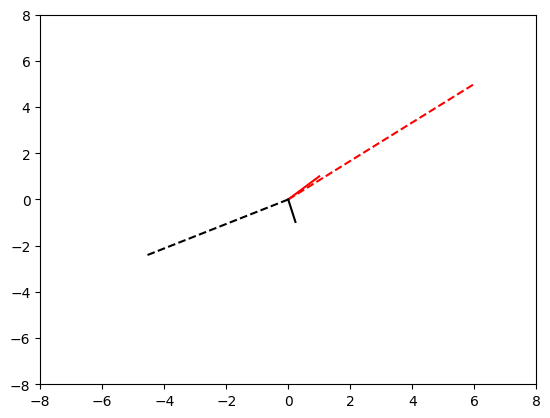

In [34]:
# matrix
#A = [ [1,5], [2,4] ]
A = [ [1,5], [2,3] ]

# extract the eigenvalues
eigvals = np.linalg.eig(A)

# note that the eigenvalues are in the first element of eigvals:
print(eigvals)
print(eigvals[0])

# specify two vectors
v1 = np.array([ 1,1 ])    # is an eigenvector for A = [[1, 5], [2, 4]]
v2 = np.random.randn(2,1) # unlikely to be an eigenvector
v2 = np.squeeze(v2, axis=1)  # to fix dimension issue in plt.plot
v2 = v2/np.linalg.norm(v2)# unit length for convenience

# compute Av
Av1 = A@v1
Av2 = A@v2

# plot the vectors and Av
plt.plot([0,v1[0]] ,[0,v1[1]],'r')
plt.plot([0,Av1[0]],[0,Av1[1]],'r--')  # v1 is scaled by A
plt.plot([0.0,v2[0]] ,[0.0,v2[1]],'k')
plt.plot([0,Av2[0]],[0,Av2[1]],'k--')  # v2 is rotated by A

plt.axis([-8,8,-8,8])
plt.show()

In [35]:
# confirm eigenvalues for a 3x3 matrix

# specify matrix
A = [ [-2,  2, -3 ],
      [-4,  1, -6 ],
      [-1, -2,  0 ]  ]

# get eigenvalues
evals = np.linalg.eig(A)
print(evals[0])

[-3. -1.  3.]


### Code challenge: eigenvalues of diagonal and triangular matrices

In [36]:
# generate diagonal matrix (2x2), compute eigenvalues
A = np.diag([2, 1])
print(A)
print(np.linalg.eig(A)[0])

[[2 0]
 [0 1]]
[2. 1.]


In [37]:
# expand to NxN diagonal
A = np.diag(np.arange(3, 18))
print(A)
print(np.linalg.eig(A)[0])

[[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  6  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  8  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  9  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 12  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 14  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 17]]
[ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.]


In [38]:
# repeat with upper triangular 
A = np.triu(np.random.randn(4,4))
print(A)
print(np.linalg.eig(A)[0])

[[-0.34686958 -1.02813921 -0.43132947  0.12647755]
 [ 0.          1.44644312  2.05873896 -2.93491509]
 [ 0.          0.          0.81601432  2.04123693]
 [ 0.          0.          0.         -0.09407782]]
[-0.34686958  1.44644312  0.81601432 -0.09407782]


In [39]:
# repeat with lower triangular 
A = np.tril(np.random.randn(4,4))
print(A)
print(np.linalg.eig(A)[0])  # the order is different

[[ 0.04016873  0.          0.          0.        ]
 [ 0.00427537  0.36326327  0.          0.        ]
 [-0.31142728  0.46048164 -0.32345323  0.        ]
 [-0.92143289 -0.33442615 -1.45402298 -0.84907902]]
[-0.84907902 -0.32345323  0.36326327  0.04016873]


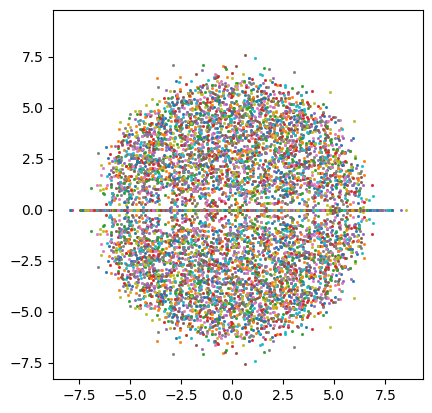

In [40]:
# Code Challenge: eigenvalues of random matrices

# generate 40x40 matrices, extract eigenvalues, plot them
# repeat lots of times in the same plot

for i in range(200):
    A = np.random.randn(40, 40)
    evals = np.linalg.eig(A)[0]
    plt.plot(np.real(evals), np.imag(evals), 's', markersize=1)

plt.axis('square')
plt.show()


---
# VIDEO: Finding eigenvectors
---


In [41]:
# matrix
A = [ [1,2], [2,1] ]

# eigenvectors (compare with code above)
# note also the differences with MATLAB: different order, evals in vector
evals, evecs = np.linalg.eig(A)  # or (L, W) or (D, V)
print(evals), print(' ')
print(evecs)  # python normalized the vector (i/sqrst(magnitude))

[ 3. -1.]
 
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


0.9999999999999999 0.9999999999999999


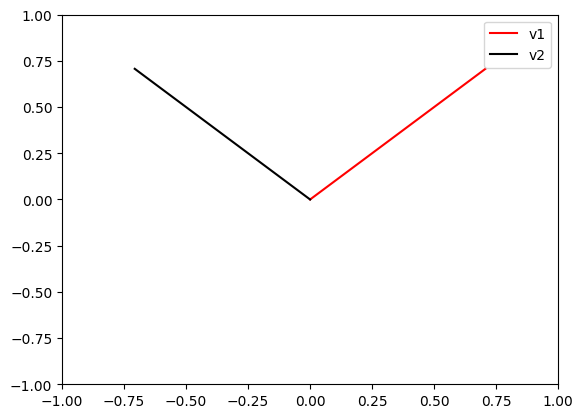

In [42]:
# compute the norm of each eigenvector
mag_v1 = np.sqrt( np.sum( np.square(evecs[:,0])) )
mag_v2 = np.sqrt( np.sum( np.square(evecs[:,1])) )
print(mag_v1,mag_v2)

# plot
plt.plot([0,evecs[0,0]],[0,evecs[1,0]],'r',label='v1')
plt.plot([0,evecs[0,1]],[0,evecs[1,1]],'k',label='v2')


plt.axis([-1,1,-1,1])
plt.legend()
plt.show()


---
# VIDEO: Diagonalization
---


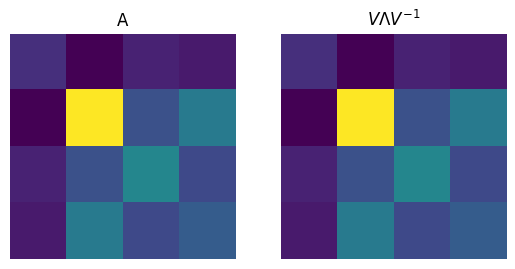

Reconstruction RMS: 1.611410342060722e-13


In [43]:
## eigendecomposition of A

# make a symmetric matrix, a symmetric matrix has a real eigenvalues, not complex eigenvalues.
A = np.round(10*np.random.randn(4,4))
A = A.T@A

# eigendecomposition
evals,evecs = np.linalg.eig(A)

# test reconstruction
Ap = evecs @ np.diag(evals) @ np.linalg.inv(evecs)


# plot
plt.subplot(121)
plt.imshow(A)
plt.axis('off')
plt.title('A')

plt.subplot(122)
plt.imshow(Ap)
plt.axis('off')
plt.title('$V\Lambda V^{-1}$')

plt.show()

# subtract the two (should be zero with rounding errors)
recondiff = A-Ap

# reconstruction error (note the numerical inaccuracies)
rmsA = np.sqrt( np.mean(np.square( np.reshape(recondiff,(1,-1)) )) )

print('Reconstruction RMS:', rmsA)


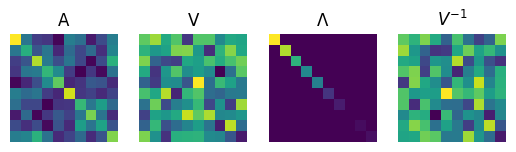

In [44]:
## diagonalization in images

# A matrix
A = np.random.randn(10,10)
A = A.T@A

# eigendecomposition
D,V = np.linalg.eig(A)

# show the results
plt.subplot(141)
plt.imshow(A)
plt.title('A')
plt.axis('off')

plt.subplot(142)
plt.imshow(V)
plt.title('V')
plt.axis('off')

plt.subplot(143)
plt.imshow(np.diag(D))
plt.title('$\Lambda$')
plt.axis('off')

plt.subplot(144)
plt.imshow(np.linalg.inv(V))
plt.title('$V^{-1}$')
plt.axis('off')

plt.show()


---
# VIDEO: Matrix powers via diagonalization
---


In [45]:
## matrix powers

A = np.random.rand(2,2)

# compute matrix power directly
print( np.linalg.matrix_power(A,3) ) # A@A@A
print(' ')

# and via eigendecomposition
D,V = np.linalg.eig(A)
D = np.diag(D)

# reproduce via diagonalization
print(V @ np.linalg.matrix_power(D,3) @ np.linalg.inv(V) )

[[0.12334058 0.04092787]
 [0.02899365 0.04177509]]
 
[[0.12334058 0.04092787]
 [0.02899365 0.04177509]]


[[-0.48615495 -0.79939348 -0.35302044]
 [-0.70631005  0.59731996 -0.37991444]
 [-0.51456728 -0.0646446   0.8550097 ]]
 
[[ 0.48615495 -0.79939348  0.35302044]
 [ 0.70631005  0.59731996  0.37991444]
 [ 0.51456728 -0.0646446  -0.8550097 ]]


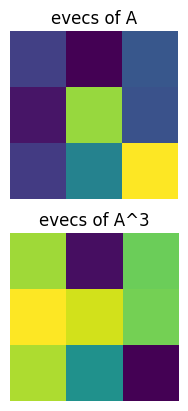

In [46]:
## eigenvalues of A and A^3

# create a symmetric matrix
A = np.random.rand(3,3)
A = A@A.T

D,V   = np.linalg.eig(A)
D3,V3 = np.linalg.eig( A@A@A )

print(V), print(' ')
print(V3)

plt.subplot(221)
plt.imshow(V)
plt.axis('off')
plt.title('evecs of A')

plt.subplot(223)
plt.imshow(V3)
plt.axis('off')
plt.title('evecs of A^3')

plt.show()

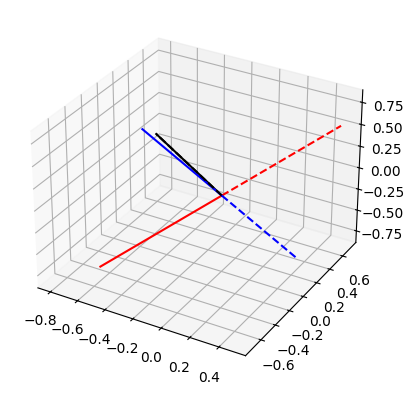

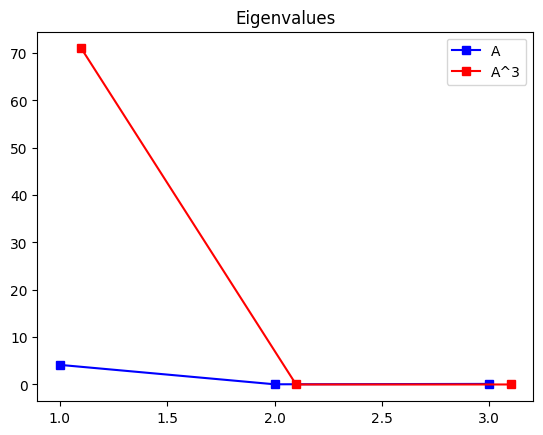

In [47]:
## plot the eigenvectors and eigenvalues

fig = plt.figure()
# ax = fig.gca(projection='3d')
ax = plt.subplot(projection='3d')

# plot eigenvectors of A
ax.plot([0,V[0,0]],[0,V[1,0]],[0,V[2,0]],'r')
ax.plot([0,V[0,1]],[0,V[1,1]],[0,V[2,1]],'k')
ax.plot([0,V[0,2]],[0,V[1,2]],[0,V[2,2]],'b')

# plot eigenvectors of A^3
ax.plot([0,V3[0,0]],[0,V3[1,0]],[0,V3[2,0]],'r--')
ax.plot([0,V3[0,1]],[0,V3[1,1]],[0,V3[2,1]],'k--')
ax.plot([0,V3[0,2]],[0,V3[1,2]],[0,V3[2,2]],'b--')

plt.show()

## show the eigenvalues
plt.plot([1,2,3],D,'bs-',label='A')
plt.plot([1.1,2.1,3.1],D3,'rs-',label='A^3')
plt.title('Eigenvalues')
plt.legend()
plt.show()

In [48]:
print(D), print(' ')
print(D3), print(' ')
print(D**3)

[4.14047151 0.03925801 0.1213859 ]
 
[7.09821915e+01 6.05041199e-05 1.78856494e-03]
 
[7.09821915e+01 6.05041199e-05 1.78856494e-03]


### Code Challenge: edgendecomposition of matrix differences
$$(A-B)v = \lambda v$$
$$(A^2-AB-BA-B^2)v = \lambda^2 v$$

In [49]:
# Code Challenge: edgendecomposition of matrix differences

A = np.random.randn(5, 5)
A = A.T@A  # make it symmetric to avoid complex numbers

B = np.random.randn(5, 5)
B = B.T@B

D1, V1 = np.linalg.eig(A-B)
D2, V2 = np.linalg.eig(A@A - A@B - B@A + B@B)  # (A-B)^2

print(np.round(D1, 3))
print(np.round(D2, 3))
print(np.round(D1**2, 3))  # the order can be difference from D2

[17.275 -8.473  4.625 -2.745 -0.328]
[2.98425e+02 7.17920e+01 2.13900e+01 7.53600e+00 1.07000e-01]
[2.98425e+02 7.17920e+01 2.13900e+01 7.53600e+00 1.07000e-01]


In [50]:
# sort eigenvalues
sidx1 = np.argsort(abs(D1))
sidx2 = np.argsort(D2)
print(sidx1)

V1 = V1[:, sidx1]
V2 = V2[:, sidx2]

np.round(V1-V2,3)

[4 3 2 1 0]


array([[-0.   , -0.   ,  1.096,  1.469, -0.77 ],
       [-0.   ,  0.   ,  0.096,  0.844,  1.581],
       [ 0.   , -0.   , -1.527,  1.047, -0.216],
       [ 0.   ,  0.   , -0.676,  0.142, -0.5  ],
       [-0.   ,  0.   , -0.03 , -0.12 , -0.782]])

In [55]:
print(np.round(V1, 2), '\n')
print(np.round(V2, 2))

[[-0.02 -0.11  0.55  0.73 -0.39]
 [ 0.38  0.22  0.05  0.42  0.79]
 [-0.34  0.14 -0.76  0.52 -0.11]
 [ 0.76 -0.49 -0.34  0.07 -0.25]
 [ 0.4   0.82 -0.02 -0.06 -0.39]] 

[[-0.02 -0.11 -0.55 -0.73  0.39]
 [ 0.38  0.22 -0.05 -0.42 -0.79]
 [-0.34  0.14  0.76 -0.52  0.11]
 [ 0.76 -0.49  0.34 -0.07  0.25]
 [ 0.4   0.82  0.02  0.06  0.39]]



---
# VIDEO: Eigenvectors of repeated eigenvalues
---


In [62]:
# this code is copy-pasted with some light editing from:
# https://stackoverflow.com/questions/3461869/plot-a-plane-based-on-a-normal-vector-and-a-point-in-matlab-or-matplotlib

from matplotlib.patches import Circle, PathPatch
from matplotlib.transforms import Affine2D
from mpl_toolkits.mplot3d import art3d

def plot_vector(fig, orig, v, color='blue'):
   ax = fig.gca(projection='3d')
   orig = np.array(orig); v=np.array(v)
   ax.quiver(orig[0], orig[1], orig[2], v[0], v[1], v[2],color=color)
   ax.set_xlim(0,10);ax.set_ylim(0,10);ax.set_zlim(0,10)
   # ax = fig.gca(projection='3d')  # error
   ax = plt.subplot(projection='3d')
   return fig

def rotation_matrix(d):
    sin_angle = np.linalg.norm(d)
    if sin_angle == 0:return np.identity(3)
    d /= sin_angle
    eye = np.eye(3)
    ddt = np.outer(d, d)
    skew = np.array([[    0,  d[2],  -d[1]],
                  [-d[2],     0,  d[0]],
                  [d[1], -d[0],    0]], dtype=np.float64)

    M = ddt + np.sqrt(1 - sin_angle**2) * (eye - ddt) + sin_angle * skew
    return M

def pathpatch_2d_to_3d(pathpatch, z, normal):
    if type(normal) is str: #Translate strings to normal vectors
        index = "xyz".index(normal)
        normal = np.roll((1.0,0,0), index)

    normal /= np.linalg.norm(normal) #Make sure the vector is normalised
    path = pathpatch.get_path() #Get the path and the associated transform
    trans = pathpatch.get_patch_transform()

    path = trans.transform_path(path) #Apply the transform

    pathpatch.__class__ = art3d.PathPatch3D #Change the class
    pathpatch._code3d = path.codes #Copy the codes
    pathpatch._facecolor3d = pathpatch.get_facecolor #Get the face color    

    verts = path.vertices #Get the vertices in 2D

    d = np.cross(normal, (0, 0, 1)) #Obtain the rotation vector    
    M = rotation_matrix(d) #Get the rotation matrix

    pathpatch._segment3d = np.array([np.dot(M, (x, y, 0)) + (0, 0, z) for x, y in verts])

def pathpatch_translate(pathpatch, delta):
    pathpatch._segment3d += delta

def plot_plane(ax, point, normal, size=10, color='g'):    
    p = Circle((0, 0), size, facecolor = color, alpha = .8)
    ax.add_patch(p)
    pathpatch_2d_to_3d(p, z=0, normal=normal)
    pathpatch_translate(p, (point[0], point[1], point[2]))


o = np.array([5,5,5])
v = np.array([3,3,3])
n = [0.5, 0.5, 0.5]

from mpl_toolkits.mplot3d import Axes3D

[4. 6. 4.]

[[ 0.         -0.6882472   0.7071002 ]
 [ 0.          0.6882472   0.7071002 ]
 [ 1.         -0.22941573 -0.00431468]]


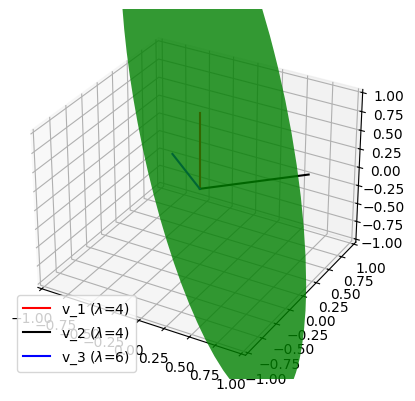

In [65]:
### Note about this cell: you need first to run the following cell,
#   then come back and run this one!

# a matrix
A = [ [ 5,  -1,  0], 
      [-1,   5,  0],
      [1/3,-1/3, 4] ]

# its eigendecomposition
D,V = np.linalg.eig(A)
print(D)
print()
print(V)  # The 3rd v is normalized (1, 1, 0)

# sort eigenvalues
i = np.argsort(D)
D = D[i]
V = V[:,i]


## plot eigenvectors
fig = plt.figure()
# ax = fig.gca(projection='3d')  # error
ax = plt.subplot(projection='3d')

# plot eigenvectors of A
ax.plot([0,V[0,0]],[0,V[1,0]],[0,V[2,0]],'r',label='v_1 ($\lambda$=%g)' %D[0])
ax.plot([0,V[0,1]],[0,V[1,1]],[0,V[2,1]],'k',label='v_2 ($\lambda$=%g)' %D[1])
ax.plot([0,V[0,2]],[0,V[1,2]],[0,V[2,2]],'b',label='v_3 ($\lambda$=%g)' %D[2])
plt.legend()

# plot subspace spanned by same-eigenvalued eigenvectors
plot_plane(ax, V[:,0],V[:,1],size=3)  # check the funtion in the next lib code
ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)

plt.show()



---
# Eigendecomposition of symmetric matrices
---


In [66]:
# create a random matrix
A = np.random.randn(14,14)

# make it symmetric (additive method)
A = A+A.T

# diagonalize it
evals,evecs = np.linalg.eig(A)
print(evecs)  # printing it is not useful.

# magnitudes of each vector
print( np.sqrt( sum(evecs**2) ) )

[[-1.11591103e-01  1.47961369e-01  9.35817414e-02 -2.74336285e-01
   9.22138838e-02  6.74876547e-01  1.03553381e-01  1.50494943e-01
  -8.38831593e-02 -7.86428873e-02  2.44039581e-01 -3.48084549e-01
   3.73535390e-01  2.25466601e-01]
 [ 1.04644842e-01 -5.23894830e-01  2.43060144e-01  8.23843155e-03
  -4.08292064e-01 -7.08285169e-02  1.25429066e-01 -2.94876121e-02
  -5.17395147e-01  2.27971157e-01  2.96592653e-01 -1.90009105e-01
  -1.12025467e-01  1.04055501e-01]
 [ 1.39134326e-01 -2.33108119e-01 -1.51790352e-01  4.62681835e-02
   2.42675774e-01  4.75365867e-01  3.51324520e-01 -2.38109514e-01
   2.09946724e-01  4.61697720e-01  6.21909933e-02  2.96216695e-01
  -2.82611988e-01 -8.60691190e-02]
 [ 1.38161395e-01  1.90852233e-01  1.11012929e-01 -3.06720384e-01
   1.81788462e-01 -2.80613852e-01  7.51313754e-02 -2.15397558e-01
   2.90399156e-01  1.47723512e-01  2.69146378e-01 -6.10251118e-01
  -3.18875357e-01 -1.46874028e-01]
 [ 5.85803180e-01 -2.23194145e-01 -2.16710642e-01  3.22543682e-01
  

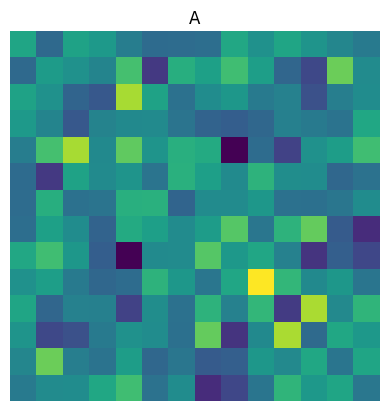

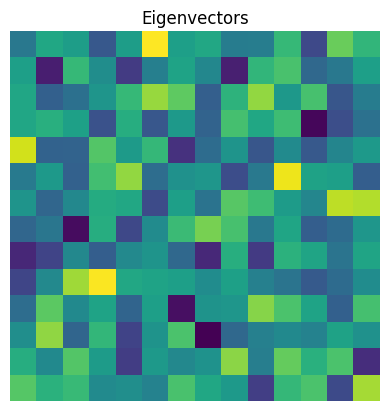

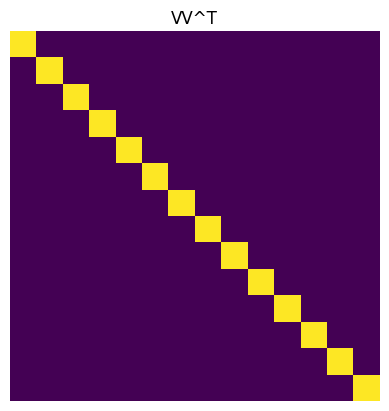

In [67]:
# and make plots
plt.imshow(A)
plt.axis('off')
plt.title('A')
plt.show()

plt.imshow(evecs)
plt.axis('off')
plt.title('Eigenvectors')
plt.show()

plt.imshow(evecs@evecs.T)  # Identify matrix
plt.axis('off')
plt.title('VV^T')
plt.show()

## Code Challenge: reconstruct a matrix from eignelayers

In [7]:
# create an mxm symmetric matrix (5x5), take engiendecomp.
import numpy as np

m = 5
A = np.random.randn(5, 5)
A = np.round(10*A.T@A)  # make A symmetric

D, V = np.linalg.eig(A)

# print(A)
# print()
# print(D)
# print()
# print(V)

v = V[:, 2]  # convert to column vector, but v has no orientation
# print(v.T)
print(np.reshape(v, (m, 1)))  # column vector
print(np.reshape(v, (m, 1)).T)  # row vector

[[-0.42288042]
 [ 0.65768361]
 [-0.16923732]
 [ 0.58809466]
 [ 0.11886047]]
[[-0.42288042  0.65768361 -0.16923732  0.58809466  0.11886047]]


In [11]:
# show that the norm of the outer product of v_i = 1
op = np.outer(v, v)
print(op)
print()

v = np.reshape(V[:, 2], (m, 1))
print(v*v.T)  # with orientation, can use *
print()

print(np.linalg.norm(op))

[[ 0.17882785 -0.27812152  0.07156715 -0.24869372 -0.05026377]
 [-0.27812152  0.43254773 -0.11130461  0.38678022  0.07817258]
 [ 0.07156715 -0.11130461  0.02864127 -0.09952756 -0.02011563]
 [-0.24869372  0.38678022 -0.09952756  0.34585533  0.06990121]
 [-0.05026377  0.07817258 -0.02011563  0.06990121  0.01412781]]

[[ 0.17882785 -0.27812152  0.07156715 -0.24869372 -0.05026377]
 [-0.27812152  0.43254773 -0.11130461  0.38678022  0.07817258]
 [ 0.07156715 -0.11130461  0.02864127 -0.09952756 -0.02011563]
 [-0.24869372  0.38678022 -0.09952756  0.34585533  0.06990121]
 [-0.05026377  0.07817258 -0.02011563  0.06990121  0.01412781]]

0.9999999999999999


In [13]:
# create one layer of A as lvv', compute its norm
print(v*D[2]*v.T)
print()

print(np.linalg.norm(v*D[2]*V.T))
print(D[2])

[[ 1.28397862 -1.99690421  0.51384999 -1.78561346 -0.36089234]
 [-1.99690421  3.10567977 -0.79916378  2.77707041  0.56127682]
 [ 0.51384999 -0.79916378  0.20564346 -0.71460493 -0.1444296 ]
 [-1.78561346  2.77707041 -0.71460493  2.48323093  0.50188859]
 [-0.36089234  0.56127682 -0.1444296   0.50188859  0.10143727]]

7.179970051800698
7.179970051800697


In [14]:
# reconstruct A by summer over outer products

Arecon = np.zeros((m, m))

for i in range(m):
    v = np.reshape(V[:, i], (m, 1))
    Arecon += v*D[i]*v.T
    print(np.linalg.matrix_rank(Arecon))

print(), print()
print(A), print()
print(Arecon), print()
print(A-Arecon)

1
2
3
4
5


[[  2.   1.   5.  -3.  -2.]
 [  1.  24.  12. -11. -18.]
 [  5.  12.  55.  10. -30.]
 [ -3. -11.  10.  20.   1.]
 [ -2. -18. -30.   1.  52.]]

[[  2.   1.   5.  -3.  -2.]
 [  1.  24.  12. -11. -18.]
 [  5.  12.  55.  10. -30.]
 [ -3. -11.  10.  20.   1.]
 [ -2. -18. -30.   1.  52.]]

[[ 3.77475828e-15 -3.55271368e-15 -8.88178420e-16  4.44089210e-16
  -1.77635684e-15]
 [-3.10862447e-15 -1.77635684e-14 -3.19744231e-14 -3.55271368e-15
   2.48689958e-14]
 [-8.88178420e-16 -3.01980663e-14  0.00000000e+00  0.00000000e+00
  -3.19744231e-14]
 [ 4.44089210e-16 -1.77635684e-15  0.00000000e+00 -3.55271368e-15
  -7.10542736e-15]
 [-1.77635684e-15  2.13162821e-14 -3.19744231e-14 -6.21724894e-15
   1.42108547e-14]]


## Code Challenge: trace and determinant, eigenvalues sum and product

In [17]:
# trace(A) = sum(evals)
# det(A) = prod(evals)

A = np.random.randn(7, 7)
tr = np.matrix.trace(A)
dt = np.linalg.det(A)
l = np.linalg.eig(A)[0]  # eigenvalues
print(l), print()

print(tr, sum(l))
print(dt, np.prod(l))


[ 2.70673049+0.j         -2.36515965+0.j         -0.27929136+2.16101206j
 -0.27929136-2.16101206j  0.57039737+1.15226018j  0.57039737-1.15226018j
  0.25886961+0.j        ]

1.1826524534249638 (1.1826524534249647+0j)
-13.007171622098038 (-13.007171622098065+0j)


In [19]:
A = np.random.randn(7, 5) @ np.random.rand(5, 7)
print(np.linalg.matrix_rank(A)), print()
tr = np.matrix.trace(A)
dt = np.linalg.det(A)
l = np.linalg.eig(A)[0]  # eigenvalues
print(l), print()

print(tr, sum(l))
print(dt, np.prod(l))  # both are basically zeros, check the magnitude of the both values.

5

[ 2.47951454e+00+0.j         -3.26738091e-01+1.18745733j
 -3.26738091e-01-1.18745733j  7.73936821e-01+0.j
 -1.53599927e-01+0.j         -3.34080344e-16+0.j
  1.78543800e-15+0.j        ]

2.4463752542437476 (2.446375254243747+0j)
9.698688752950705e-32 (2.6668023598536726e-31+0j)



---
# VIDEO: Generalized eigendecomposition
---


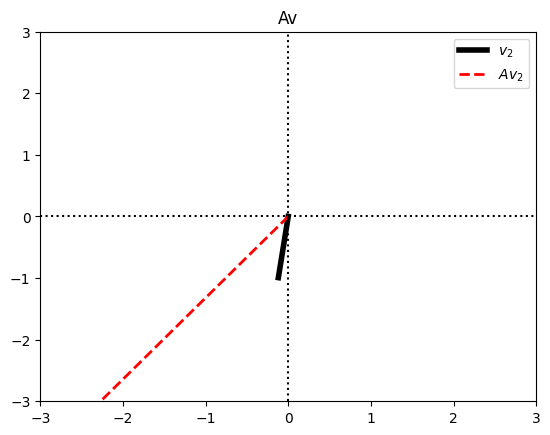

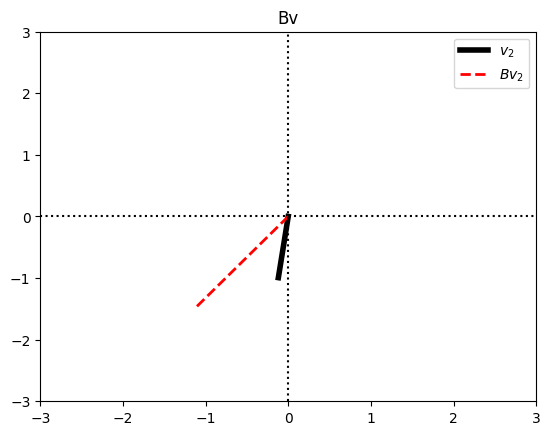

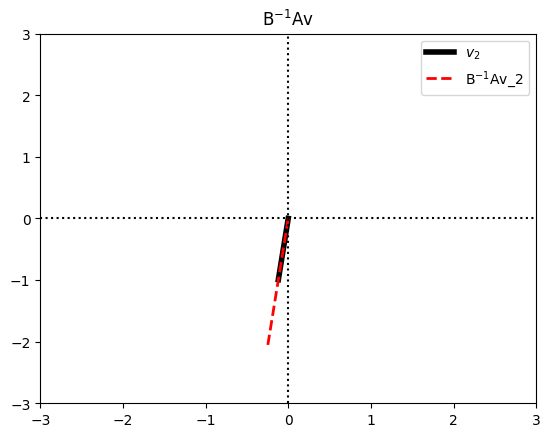

In [69]:
import scipy.linalg # kindof annoying, but numpy doesn't do GED

# define matrices
A = np.array([ [3,2], [1,3]])
B = np.array([ [1,1], [4,1]])

# GED
eigvals,eigvecs = scipy.linalg.eig(A,B)


# matrix-vector multiplication
Av = A@eigvecs[:,1]
Bv = B@eigvecs[:,1]
BinvAv = np.linalg.inv(B)@A@eigvecs[:,1]


plt.plot([0,eigvecs[0,1]],[0,eigvecs[1,1]],'k',linewidth=4,label='$v_2$')
plt.plot([0,Av[0]],[0,Av[1]],'r--',linewidth=2,label='$Av_2$')
plt.xlim([-3,3]), plt.ylim([-3,3])
plt.plot([-3,3],[0,0],'k:')
plt.plot([0,0],[-3,3],'k:')
plt.legend()
plt.title('Av')
plt.show()

plt.plot([0,eigvecs[0,1]],[0,eigvecs[1,1]],'k',linewidth=4,label='$v_2$')
plt.plot([0,Bv[0]],[0,Bv[1]],'r--',linewidth=2,label='$Bv_2$')
plt.xlim([-3,3]), plt.ylim([-3,3])
plt.plot([-3,3],[0,0],'k:')
plt.plot([0,0],[-3,3],'k:')
plt.legend()
plt.title('Bv')
plt.show()


plt.plot([0,eigvecs[0,1]],[0,eigvecs[1,1]],'k',linewidth=4,label='$v_2$')
plt.plot([0,BinvAv[0]],[0,BinvAv[1]],'r--',linewidth=2,label='B$^{-1}$Av_2')
plt.xlim([-3,3]), plt.ylim([-3,3])
plt.plot([-3,3],[0,0],'k:')
plt.plot([0,0],[-3,3],'k:')
plt.legend()
plt.title('B$^{-1}$Av')
plt.show()

